# 📝 Quiz — Notebook 01 a 08

**Instrucciones:** Responde directamente en este notebook. Completa las celdas de código y las de texto según se indique.

---


## Problema 1: Histograma y Carga de Imagen (25 pts)

1. Carga la imagen `lenna.png` en **RGB** y en **escala de grises**. (5 pts)  
2. Muestra ambas imágenes lado a lado. (10 pts)  
3. Genera el **histograma de la imagen en escala de grises** e interprétalo en 4–5 líneas:  
   - ¿Dónde se concentra la mayor parte de los niveles de intensidad?  
   - ¿Qué información útil nos da este histograma en el contexto de visión robótica? (10 pts)


✅ Imagen cargada correctamente con tamaño: (512, 512, 3)


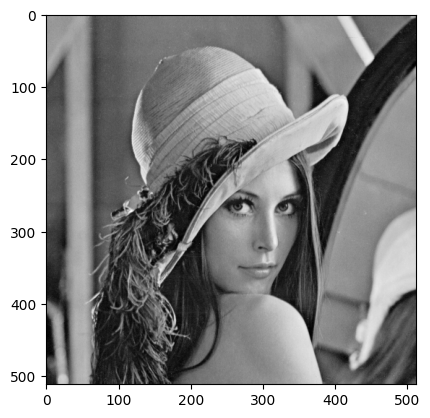

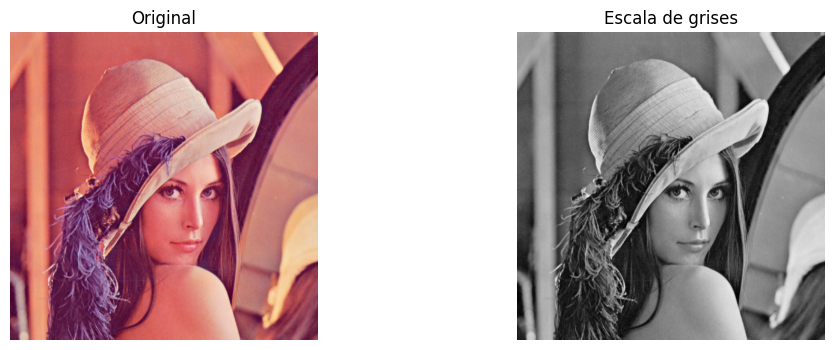

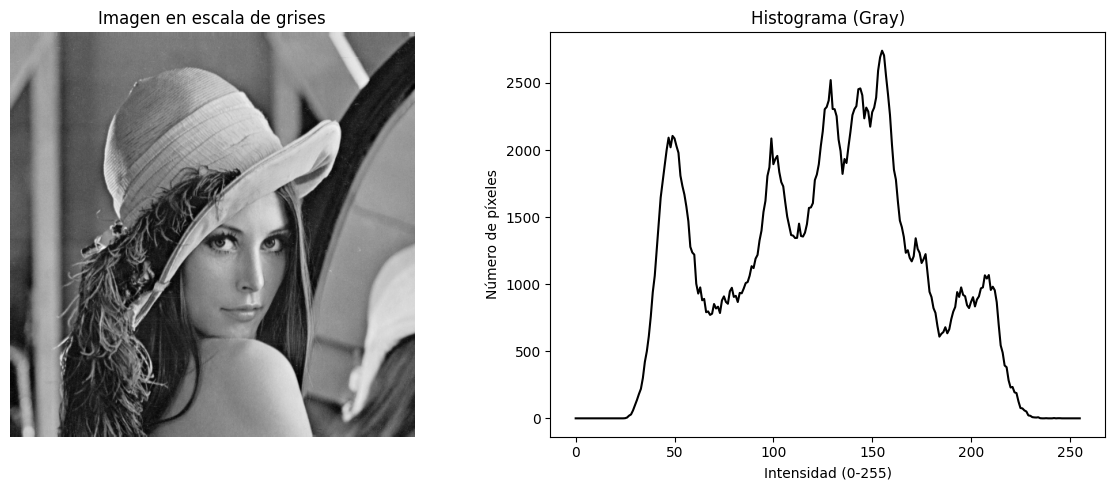

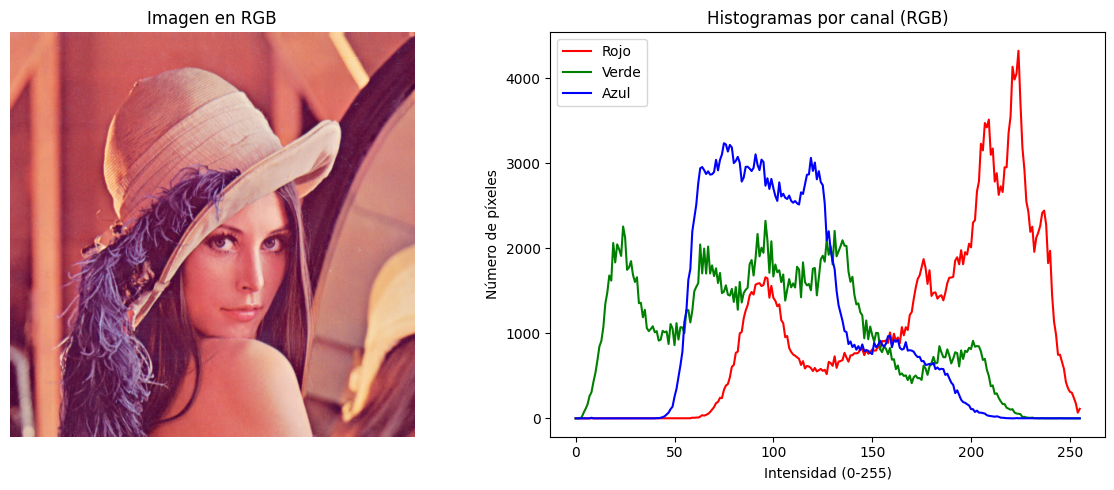

In [2]:
# Tu código aquí para cargar la imagen en RGB y en escala de grises,
# mostrar ambas lado a lado y graficar el histograma en grises.
# ✅ Importar librerías necesarias
import cv2
import matplotlib.pyplot as plt

# ✅ Leer la imagen (ruta relativa, por ejemplo desde carpeta imagenes)
## Nota: asegúrate de tener una imagen llamada "lenna.png" o cualquier otra en imagenes/
img_bgr = cv2.imread(r"C:\Users\rrm21\Documents\Vision_en_Robotica\imagenes\lenna.png")# Cambia la ruta según tu estructura de carpetas

# Verificar si la imagen se cargó
if img_bgr is None:
    print("⚠️ No se pudo cargar la imagen. Verifica la ruta.")
else:
    print("✅ Imagen cargada correctamente con tamaño:", img_bgr.shape)

if img_bgr is not None:
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)

# ✅ Convertir a escala de grises
if img_bgr is not None:
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    plt.imshow(img_gray, cmap="gray")


plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.imshow(img_rgb);  plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(img_gray, cmap="gray"); plt.title("Escala de grises"); plt.axis("off")
plt.show()

if img_bgr is not None:
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Calcular histograma
    hist_gray = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

    # Figura combinada
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Imagen en gris
    axes[0].imshow(img_gray, cmap="gray")
    axes[0].set_title("Imagen en escala de grises")
    axes[0].axis("off")

    # Histograma gris
    axes[1].plot(hist_gray, color='black')
    axes[1].set_title("Histograma (Gray)")
    axes[1].set_xlabel("Intensidad (0-255)")
    axes[1].set_ylabel("Número de píxeles")

    plt.tight_layout()
    plt.show()

if img_bgr is not None:
    # Convertir a RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Calcular histogramas
    hist_r = cv2.calcHist([img_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([img_rgb], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([img_rgb], [2], None, [256], [0, 256])

    # Figura combinada
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Imagen RGB
    axes[0].imshow(img_rgb)
    axes[0].set_title("Imagen en RGB")
    axes[0].axis("off")

    # Histogramas
    axes[1].plot(hist_r, color='r', label='Rojo')
    axes[1].plot(hist_g, color='g', label='Verde')
    axes[1].plot(hist_b, color='b', label='Azul')
    axes[1].set_title("Histogramas por canal (RGB)")
    axes[1].set_xlabel("Intensidad (0-255)")
    axes[1].set_ylabel("Número de píxeles")
    axes[1].legend()

    plt.tight_layout()
    plt.show()


### Explicación del histograma (escribe aquí tu respuesta en 4–5 líneas)
Histograma en escala de grises:
El histograma muestra que la mayoría de las intensidades de píxel están concentradas entre 50 y 200, con picos claros en la zona de grises medios.
Esto significa que la imagen tiene un buen contraste, incluyendo áreas oscuras y brillantes sin saturación en 0 o 255.
Una distribución de este tipo conserva los detalles y texturas en toda la imagen.
En visión robótica, esto es útil para una detección de bordes confiable y para el reconocimiento de objetos.

Histograma de colores
El canal rojo domina, con valores de intensidad altos cerca de 200–250, lo que le da a la imagen un tono cálido.
El canal verde se encuentra mayormente en el rango medio, mientras que el canal azul presenta picos alrededor de 80–130.
Este equilibrio explica la apariencia rojiza de la imagen con detalles suaves en azul y verde.
En visión robótica, analizar los histogramas por canal ayuda en la segmentación por color y en la detección de objetos.


1. ¿Dónde se concentra la mayor parte de los niveles de intensidad?
La mayor parte de los niveles de intensidad se concentra en el rango intermedio, aproximadamente entre 50 y 200, con picos en la zona de grises medios. Esto muestra que la imagen incluye tanto áreas oscuras como claras, sin llegar a la saturación en los valores extremos (0 y 255).

2. ¿Qué información útil nos da este histograma en el contexto de visión robótica?
El histograma indica que la imagen tiene buen contraste, lo cual es fundamental para las tareas de visión por computadora. En robótica, esta distribución permite:

Realizar detección de bordes de forma confiable, gracias a las transiciones claras entre intensidades.

Conservar detalles y texturas, facilitando el análisis de la escena.

Mejorar el reconocimiento de objetos, al evitar la pérdida de información por saturación.

## Problema 2: Transformaciones geométricas (75 pts)

1. Carga `lenna.png` y realiza las siguientes transformaciones:  
   - **Escalado** al 50% del tamaño original. (10 pts)  
   - **Traslación** de +40 px en X y +20 px en Y. (10 pts)  
   - **Rotación** de 45° alrededor del centro de la imagen, ajustando el bounding box para evitar recortes. (15 pts)  
   - **Transformación afín**: toma 3 puntos de la imagen y defínelos manualmente para mapearlos a un triángulo distinto. (20 pts)  
   - **Transformación proyectiva**: toma 4 puntos de la imagen y mapéalos a un rectángulo destino. (20 pts)

2. Muestra todas las imágenes resultantes en una cuadrícula (ejemplo: 2 filas × 3 columnas).  

3. **Pregunta de aplicación (10 pts):** Explica con tus palabras **un caso real en robótica** donde:  
   - El **escalado** sea útil.  
   - La **rotación** sea necesaria.  
   - La **transformación proyectiva** resuelva un problema práctico.  


✅ Imagen cargada: (512, 512, 3) uint8


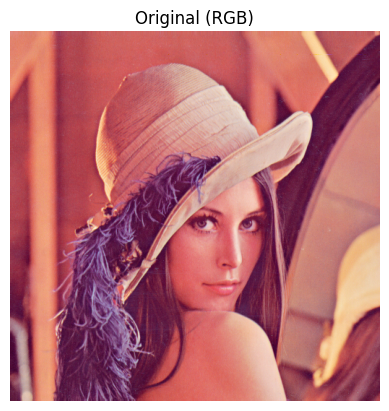

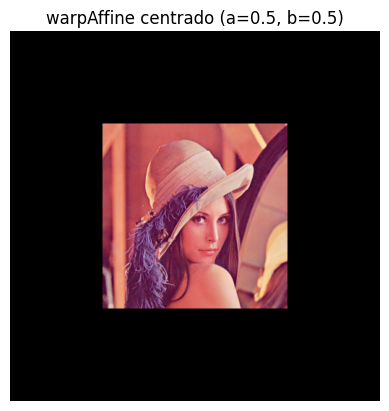

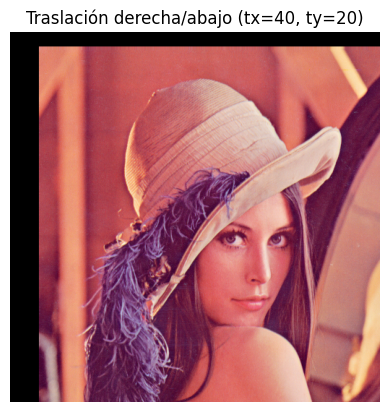

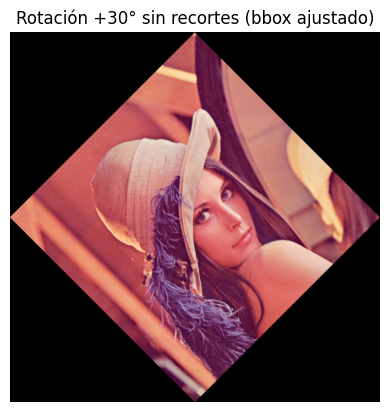

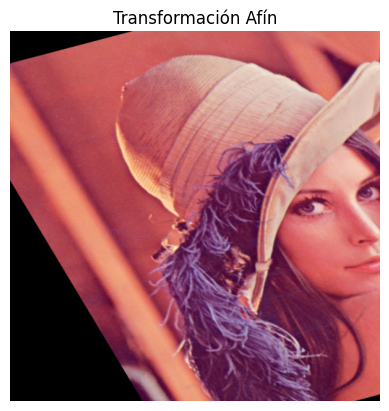

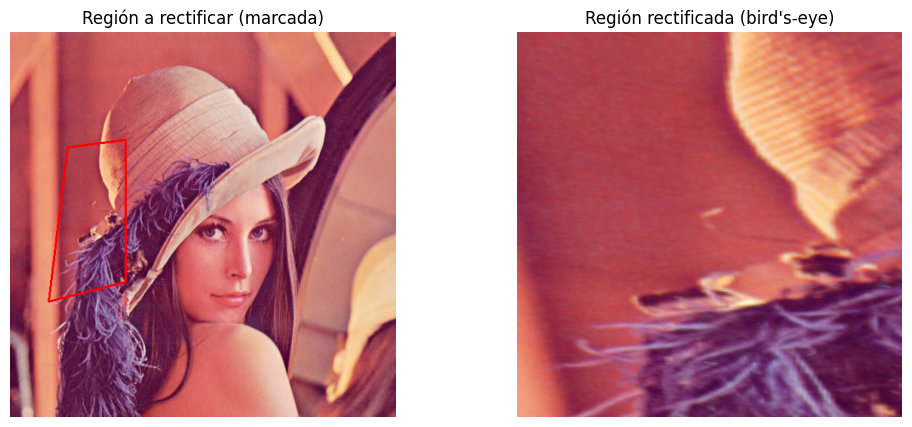

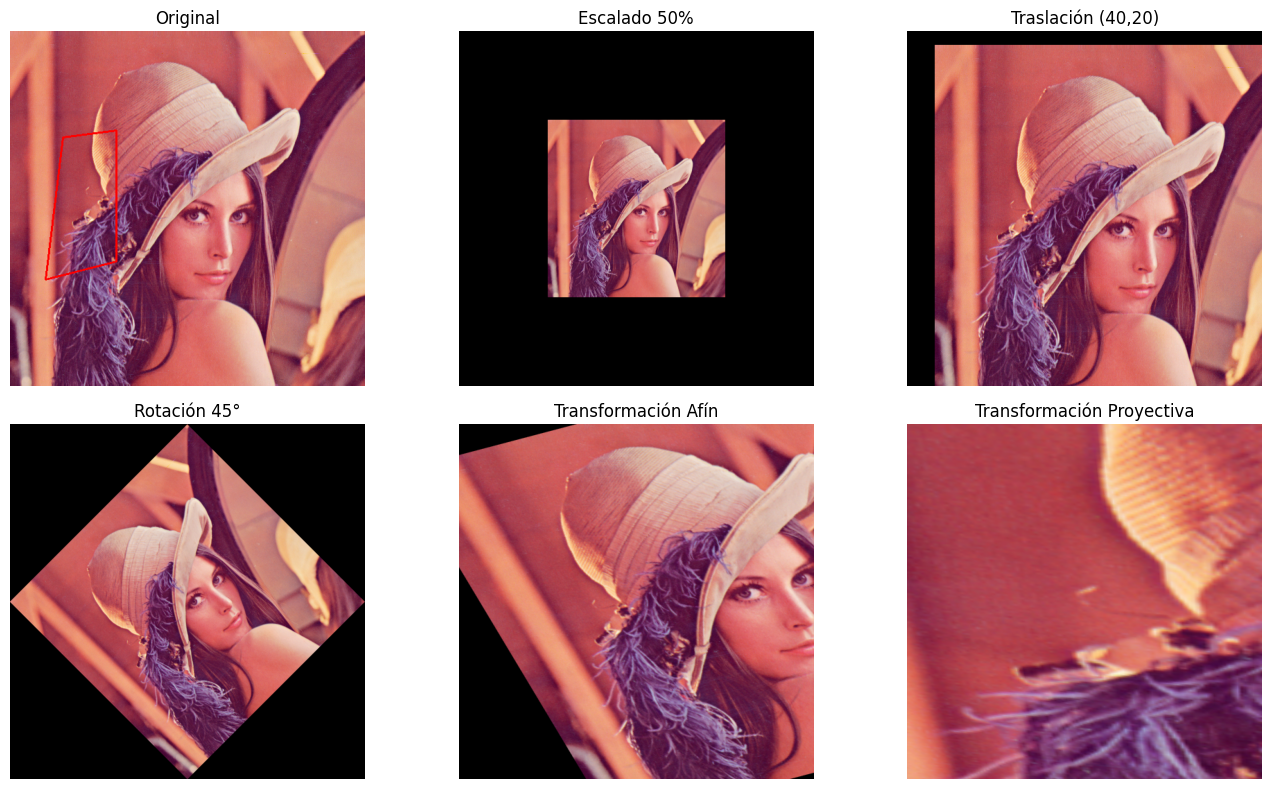

In [3]:
# Tu código aquí para aplicar las transformaciones geométricas y mostrar los resultados en cuadrícula.
# ✅ Importar librerías y cargar imagen
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar con el MISMO estilo de ruta que usas en tus notebooks
img_bgr = cv2.imread(r"C:\Users\rrm21\Documents\Vision_en_Robotica\imagenes\lenna.png")  # Cambia la ruta si es necesario

if img_bgr is None:
    raise FileNotFoundError("⚠️ No se pudo cargar la imagen. Verifica la ruta.")
print("✅ Imagen cargada:", img_bgr.shape, img_bgr.dtype)

# Convertir a RGB para mostrar correctamente en Matplotlib
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Mostrar original (una figura, sin especificar colores)
plt.imshow(img_rgb)
plt.title("Original (RGB)")
plt.axis("off")
plt.show()

h, w = img_rgb.shape[:2]
cx, cy = (w - 1) / 2.0, (h - 1) / 2.0

a, b = 0.5, 0.5  # factores de escala
tx = cx - a * cx
ty = cy - b * cy

M = np.float32([[a, 0, tx],
                [0, b, ty]])

scaled_center = cv2.warpAffine(img_rgb, M, (w, h), flags=cv2.INTER_LINEAR)

plt.imshow(scaled_center)
plt.title(f"warpAffine centrado (a={a}, b={b})")
plt.axis("off")
plt.show()

#traslación
h, w = img_rgb.shape[:2]

tx, ty = 40, 20  # desplazar 40 px a la derecha, 20 px hacia abajo
M1 = np.float32([[1, 0, tx],
                 [0, 1, ty]])

shift_rd = cv2.warpAffine(img_rgb, M1, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

plt.imshow(shift_rd); plt.title(f"Traslación derecha/abajo (tx={tx}, ty={ty})"); plt.axis("off"); plt.show()

#rotación
h, w = img_rgb.shape[:2]
center = (w/2.0, h/2.0)
angle = 45  # grados

M = cv2.getRotationMatrix2D(center, angle, 1.0)

cos = abs(M[0,0])
sin = abs(M[0,1])

new_w = int((h * sin) + (w * cos))
new_h = int((h * cos) + (w * sin))

M[0,2] += (new_w / 2.0) - center[0]
M[1,2] += (new_h / 2.0) - center[1]

rot_full = cv2.warpAffine(img_rgb, M, (new_w, new_h),
                          flags=cv2.INTER_LINEAR,
                          borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

plt.imshow(rot_full); plt.title("Rotación +30° sin recortes (bbox ajustado)"); plt.axis("off"); plt.show()

#afín
# Transformación Afín
# Definir 3 puntos en la imagen original
pts_src = np.float32([
    [50, 50],       # esquina sup izq
    [200, 50],      # sup der
    [50, 200]       # inf izq
])

# Definir el triángulo destino (ajusta si quieres)
pts_dst = np.float32([
    [10, 100],      # mover sup izq hacia abajo
    [200, 50],      # sup der igual
    [100, 250]      # inf izq más a la derecha
])

# Calcular matriz afín (2x3)
M_affine = cv2.getAffineTransform(pts_src, pts_dst)

# Aplicar la transformación
affine_img = cv2.warpAffine(img_rgb, M_affine, (w, h),
                            flags=cv2.INTER_LINEAR,
                            borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

# Mostrar
plt.imshow(affine_img)
plt.title("Transformación Afín")
plt.axis("off")
plt.show()



#proyección
# Definir una región cuadrilátera interna (ajusta estos puntos si quieres otra zona)
quad_src = np.float32([
    [int(0.15*w), int(0.30*h)],
    [int(0.30*w), int(0.28*h)],
    [int(0.30*w), int(0.65*h)],
    [int(0.10*w), int(0.70*h)],
])

# Tamaño deseado del rectángulo de salida
out_W, out_H = 400, 400

quad_dst = np.float32([
    [0, 0],
    [out_W-1, 0],
    [out_W-1, out_H-1],
    [0, out_H-1],
])

H_rect = cv2.getPerspectiveTransform(quad_src, quad_dst)
rectified = cv2.warpPerspective(img_rgb, H_rect, (out_W, out_H), flags=cv2.INTER_LINEAR,
                                borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

# Visualización
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img_rgb); ax1.set_title("Región a rectificar (marcada)"); ax1.axis("off")

# dibujar la región sobre la original
poly = quad_src.astype(int)
for i in range(4):
    p1 = tuple(poly[i])
    p2 = tuple(poly[(i+1)%4])
    cv2.line(img_rgb, p1, p2, (255,0,0), 2)  # ojo: img_rgb es RGB; dibujar con rojo puro
ax1.imshow(img_rgb)

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(rectified); ax2.set_title("Región rectificada (bird's-eye)"); ax2.axis("off")

plt.show()

# 🔹 Mostrar todas las imágenes en una cuadrícula 2x3
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

# Lista de imágenes y títulos
imagenes = [
    (img_rgb, "Original"),
    (scaled_center, "Escalado 50%"),
    (shift_rd, "Traslación (40,20)"),
    (rot_full, "Rotación 45°"),
    (affine_img, "Transformación Afín"),
    (rectified, "Transformación Proyectiva")
]

# Recorrer y mostrar
for ax, (im, titulo) in zip(axes.flat, imagenes):
    ax.imshow(im)
    ax.set_title(titulo)
    ax.axis("off")

plt.tight_layout()
plt.show()


### Respuesta de aplicación en robótica (escribe aquí tu explicación)
Escalado:
En visión por computadora aplicada a robótica, el escalado se utiliza para normalizar imágenes de distintas cámaras o sensores. Por ejemplo, un robot móvil que recibe imágenes de varias cámaras puede necesitar reducirlas a una misma resolución antes de procesarlas con algoritmos de detección de objetos, lo que optimiza el tiempo de cómputo y evita errores por diferencias de tamaño.

Rotación:
En sistemas de manipulación robótica, la rotación es necesaria cuando el robot debe alinear piezas u objetos para realizar tareas como ensamblaje, soldadura o empaque. Por ejemplo, un brazo robótico que toma una pieza desde una cinta transportadora puede rotar la imagen captada por su cámara para reconocer la orientación del objeto y ajustar la posición de su pinza antes de sujetarlo.

Transformación proyectiva:
Este tipo de transformación se aplica en robótica para corregir perspectivas y obtener vistas tipo "bird’s-eye" (vista cenital) a partir de cámaras montadas en ángulos. Por ejemplo, en un robot autónomo o un vehículo inteligente, la transformación proyectiva permite transformar la imagen captada por la cámara frontal en una vista cenital de la carretera, lo que facilita tareas como el reconocimiento de carriles, la planificación de trayectorias y la navegación segura.  
